# Rocket Assigment
Taken from: http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/courseware/8d6f3849ef8342eea94ff329460f72d9/bb72662198c84a48bcdcd158f048df10/

First thing to realize is that, based on the questions, this rocket will not make it out of the atmosphere (i.e. there will be a point where gravity and drag overtake this rocket and bring it back down to the ground), which means your end condition will be when $h = 0$ and $t \neq 0$. Next, many of the constants are given, and the function for $\dot{m_P}$ can be given by: $$\dot{m_p} = \begin{cases} 
      20 \frac{kg}{s} & 0 \leq t \leq 5 \\
      0 & t > 5 
   \end{cases}$$
   
Based on this we can begin coding:

## Start coding!!

max height =  1316.62009418 at t =  15.7 seconds
total time =  36.8 seconds with last known velocity of: -85.9175367814 m/s and a final height of: 3.95253307178e-317 meters
max velocity =  230.720089047 m/s at t =  5.0 seconds and h =  509.982213283 m/s
mass propellant at t=3.2 seconds is: 36.0 kilograms


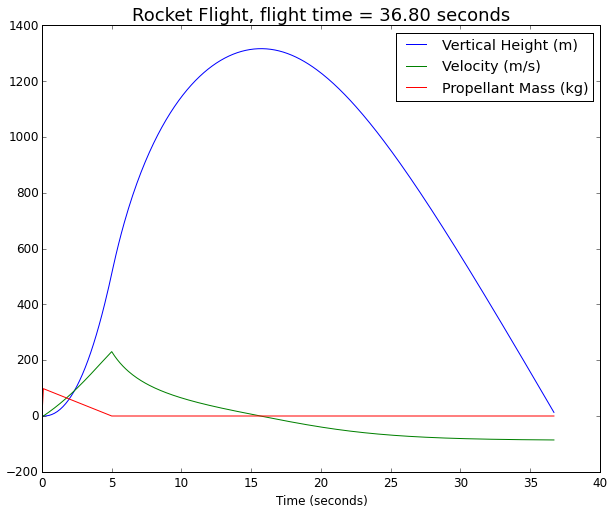

In [10]:
## Do your imports!!
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams.update({'font.size': 12})

## Declare Variables
ms = 50 # kg
g = 9.81 # m*s^-2
rho = 1.091 # kg*m^-3
r = 0.5 # m
A = numpy.pi*r**2 # m^2
ve = 325 # m*s^-1
cd=0.15 # dimensionless
dt = 0.1 # s
T = 100000 # s, high end guess on when the flight will end. 
mp0 = 100 # kg
mdp = 20 # kg*s^-1, burn rate for the first five seconds of flight
# NOTE: At t = 0, the mp = mp0 and all other variables of interest are 0.

## Declare storage units
t = numpy.linspace(0,T,int((T/dt)+1)) # s, vector of timesteps
h = numpy.empty_like(t) # m, using empty to put a non-zero-but-still-close-to-zero junk value
v = numpy.zeros_like(t) # m*s^-1
mp = numpy.zeros_like(t) # kg

## Create and implement while loop
i = int(0)
while h[i+1]>0:
    i +=1
    mp[i] = mp0 - (t[i]*mdp)
    if t[i]>=5:
        mp[i] = 0.0
        mdp = 0.0
    dv_t= -g + (((mdp*ve) - (0.5*rho*cd*A*v[i]*abs(v[i])))/(ms + mp[i]))
    v[i+1] = v[i] + dv_t*dt
    h[i+1] = h[i] + (dt*v[i])

## Trim out zeros
t = numpy.trim_zeros(t,'b')
h = numpy.trim_zeros(h,'b')
v = numpy.trim_zeros(v,'b')

## Plot values
pyplot.figure(figsize=(10,8))
pyplot.title('Rocket Flight, flight time = %.2f seconds' % t[i], fontsize=18)
pyplot.plot(t[0:i],h[0:i])
pyplot.plot(t[0:i],v[0:i])
pyplot.plot(t[0:i],mp[0:i])
pyplot.xlabel('Time (seconds)')
pyplot.legend(['Vertical Height (m)','Velocity (m/s)','Propellant Mass (kg)'])

## Get Characteristics of flight to answer questions
print("max height = ",max(h[0:i]),"at t = ",t[numpy.argmax(h[0:i])],"seconds")
print("total time = ",t[i],"seconds with last known velocity of:",v[i],"m/s and a final height of:", h[len(h)-1],"meters")
print("max velocity = ",max(v[0:i]),"m/s at t = ",t[numpy.argmax(v)],"seconds and h = ",h[numpy.argmax(v)],"m/s")
print("mass propellant at t=3.2 seconds is:",float(mp[numpy.where(t==3.2)]),"kilograms")

In [ ]:
### Second attempt, now depreciated:

## Do your imports!!
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Declare Variables (mainly the constant ones...)
ms = 50 # kg
g = 9.81 # m*s^-2
rho = 1.091 # kg*m^-3
r = 0.5 # m
A = numpy.pi*r**2 # m^2
ve = 325 # m*s^-1
cd=0.15 # dimensionless
dt = 0.1 # s

## Declare intial conditions
mp0 = 100 # kg
t0 = 0 # s
h0 = 0 # m
v0 =0 # m*s^-1

## Create storage variable (no preallocation)
sim = numpy.empty((1,4),int) # Created simulation array with values initialized with dummy first row
sim[0]=numpy.array([t0,mp0,v0,h0])
## Create a do-while construct to loop through the euler's method
for i in numpy.arange(7):
    mdp = 20 # Burn rate at t = 0 
    if sim[-1,0] > 5:
        mdp = 0 # burn rate at t > 5
        mp0 = 0 # no more propellent to burn
    euler = [sim[-1,0]+dt,
            mp0-mdp*sim[-1,0],
            (((mdp*ve-(.5*rho*sim[-1,2]*abs(sim[-1,2])*A*cd)))/(ms-(mp0-mdp*sim[-1,0])) - g)*dt+sim[-1,2],
            dt*((((mdp*ve-(.5*rho*sim[-1,2]*abs(sim[-1,2])*A*cd)))/(ms-(mp0-mdp*sim[-1,0])) - g)*dt+sim[-1,2])+sim[-1,3]]
    print(euler)
    sim = numpy.vstack((sim,euler))
    print(mp0-mdp*sim[-1,0])
    print(sim)
    if (sim[-1,3] <= 0 and sim[-1,0] != 0):
        break

## Plot the flight path
pyplot.figure()
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'h', fontsize=18)
pyplot.title('Rocket Flight, flight time = %.2f' % sim[-1,0], fontsize=18)
pyplot.plot(sim[:,0],sim[:,3], 'k-', lw=2);

In [ ]:
### began coding here, but then finished up in Jupyter Hub. The Following is now Depreciated

# Step 1, defining all your variables
h0 = 0 #meters
v0 = 0 #meters per second
mp0 = 100 #kg
ms = 50 #kg
ve = 325 #meters per second
rho = 1.019#kg per meters ^ 3 
r = 0.5 #meters
A = pi * r * r # meters ^ 2
Cd = 0.25 #dimensionless 
g = 9.81 #meters per second ^ 2
timestep = 0.1 #seconds

#step 2, define euler function
def euler_step(h,v,mp,t):
    #define m_dot_p at time t
    if t > 5: m_dot_p = 0
    else: m_dot_p = 20